In [79]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn import preprocessing
import missingno as msno

In [2]:
train = pd.read_csv("/Users/sebascordova/Desktop/Kaggle - House Prices/data/train.csv")
test = pd.read_csv("/Users/sebascordova/Desktop/Kaggle - House Prices/data/test.csv")

In [10]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


## Valores nulos

In [6]:
train.isnull().sum().sum()

6965

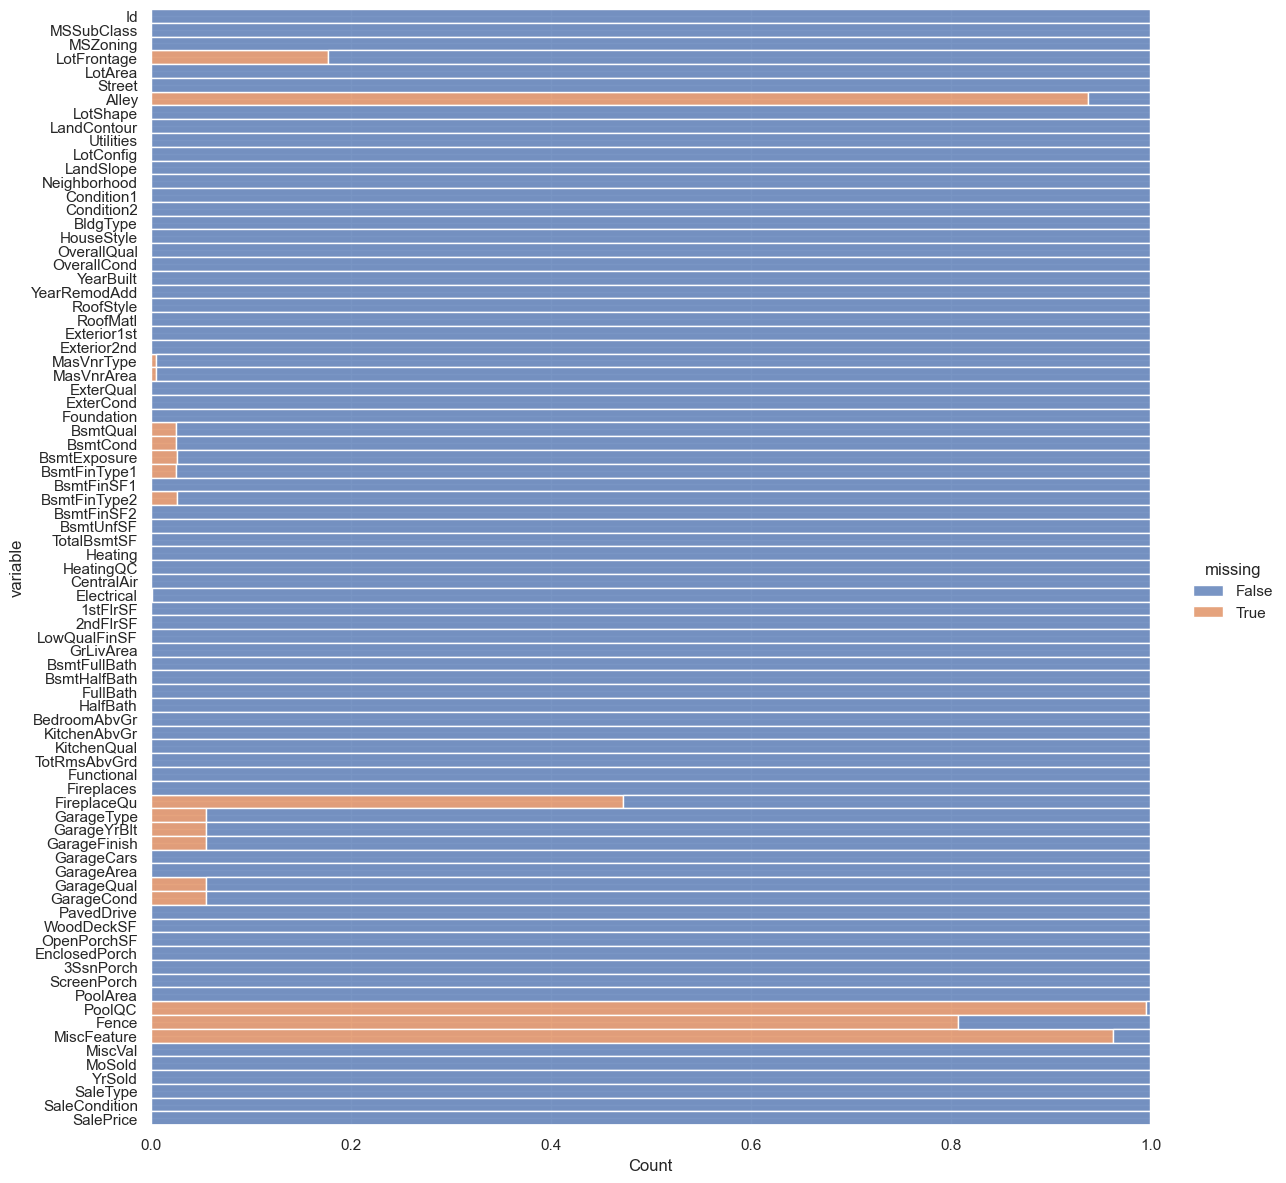

In [58]:
sns.displot(
    data=train.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=12, aspect=1,

)

## Valores duplicados

In [59]:
train.duplicated().sum()

0

## Exploración de variables

In [60]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [83]:
#Tipo de vivienda
train.MSSubClass.value_counts(dropna=False)

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [84]:
#General zoning classification
train.MSZoning.value_counts(dropna=False)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [85]:
#The number of linear feet of each parcel that directly fronts a street 
train.LotFrontage.value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
90.0      23
21.0      23
64.0      19
24.0      19
68.0      19
73.0      18
55.0      17
72.0      17
63.0      17
79.0      17
100.0     16
66.0      15
51.0      15
74.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
57.0      12
43.0      12
40.0      12
76.0      11
69.0      11
88.0      10
34.0      10
53.0      10
86.0      10
92.0      10
35.0       9
84.0       9
44.0       9
77.0       9
62.0       9
61.0       8
93.0       8
96.0       8
98.0       8
120.0      7
107.0      7
58.0       7
95.0       7
30.0       6
41.0       6
110.0      6
54.0       6
91.0       6
36.0       6
48.0       6
94.0       6
89.0       6
81.0       6
105.0      6
87.0       5
56.0       5
37.0       5
83.0       5
32.0       5
47.0       5
42.0       4
102.0      4
49.0       4
99.0       3
108.0      3
103.0      3
104.0      3
45.0       3
130.0      3

<Axes: >

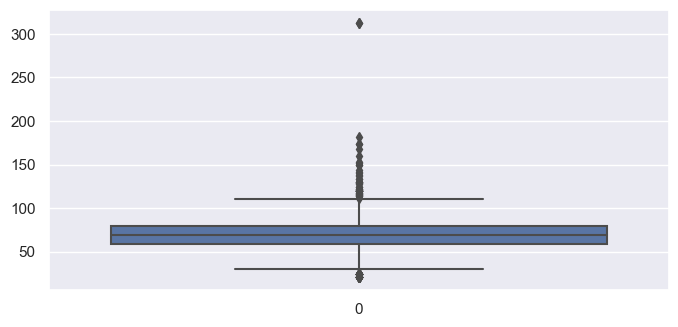

In [115]:
plt.figure(figsize = (8,8))
plt.subplot(211)
sns.boxplot(train.LotFrontage)

<Axes: >

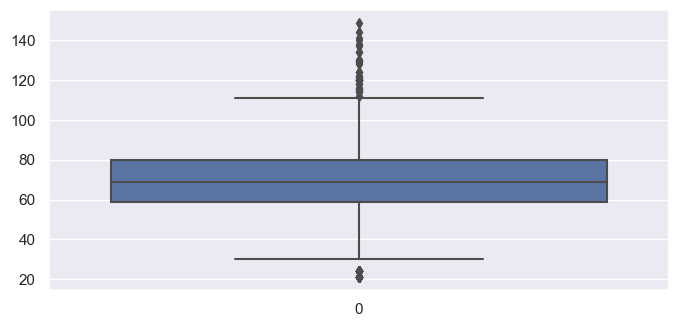

In [116]:
plt.figure(figsize = (8,8))
plt.subplot(211)
sns.boxplot(train[train["LotFrontage"]<150]["LotFrontage"])

In [100]:
#Lot size in square feet
train.LotArea.value_counts(dropna=False)

7200      25
9600      24
6000      17
9000      14
8400      14
10800     14
1680      10
7500       9
9100       8
8125       8
6120       8
6240       8
3182       7
7800       6
8450       6
4435       5
10140      5
10000      5
5000       5
4500       5
9750       5
5400       5
10400      5
9900       4
13125      4
6600       4
8800       4
8640       4
9375       4
7000       4
8750       4
7018       4
11250      4
8520       4
10625      4
8544       4
8500       4
11700      4
9120       3
8000       3
11600      3
9084       3
6762       3
7750       3
12090      3
8012       3
3675       3
13891      3
10200      3
8777       3
14115      3
10440      3
2280       3
2117       3
2522       3
10500      3
9920       3
9200       3
8712       3
4426       3
7875       3
11500      3
9400       2
1533       2
9760       2
15611      2
9819       2
5500       2
11340      2
14000      2
13500      2
12342      2
14803      2
12000      2
9060       2
9786       2
8773       2

<Axes: >

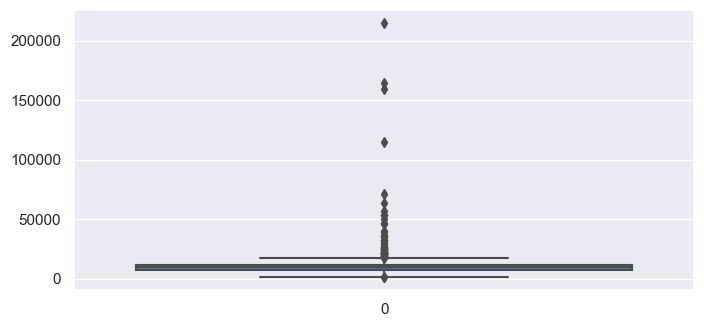

In [117]:
plt.figure(figsize = (8,8))
plt.subplot(211)
sns.boxplot(train.LotArea)

<Axes: ylabel='Frequency'>

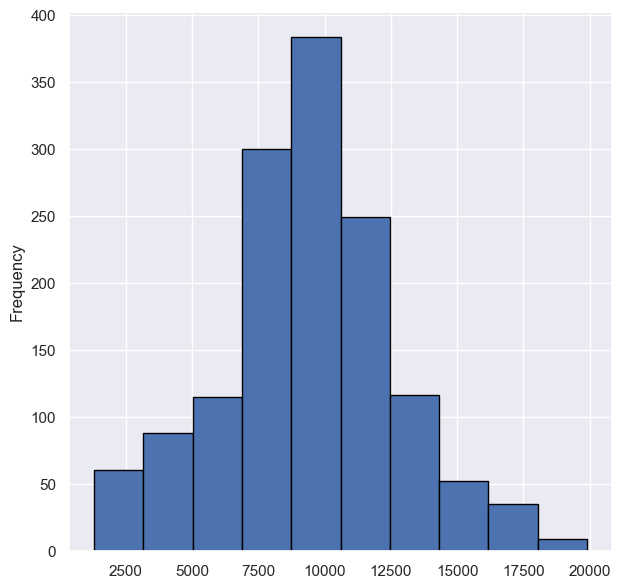

In [114]:
plt.figure(figsize = (7, 7))
train[train["LotArea"]<20000]["LotArea"].plot(kind='hist', edgecolor='black')